<a href="https://colab.research.google.com/github/khadija-AI-1208/ML-project/blob/main/titanic_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#titanic dataset import from kaggle
from google.colab import files
files.upload()

import os

# Create the Kaggle directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the uploaded kaggle.json into it
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set secure file permissions
os.chmod('/root/.kaggle/kaggle.json', 600)

!pip install -q kaggle
!kaggle competitions download -c titanic
!unzip titanic.zip
import pandas as pd
df = pd.read_csv('train.csv')
df.head()




Saving kaggle.json to kaggle.json
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#fill all column values and drop unnecessary
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<ipython-input-12-4b5f5f532d44>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
<ipython-input-12-4b5f5f532d44>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

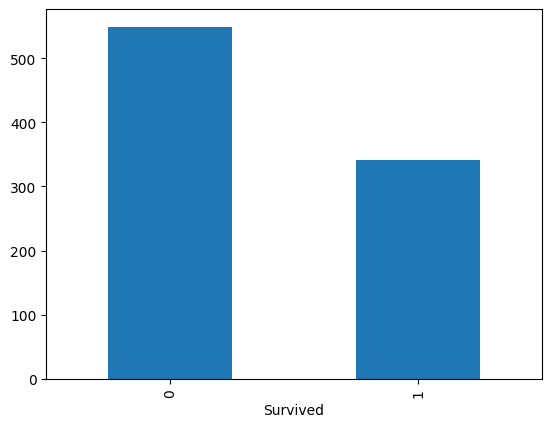

In [ ]:
import matplotlib.pyplot as plt

df.Survived.value_counts().plot(kind='bar')
plt.show()

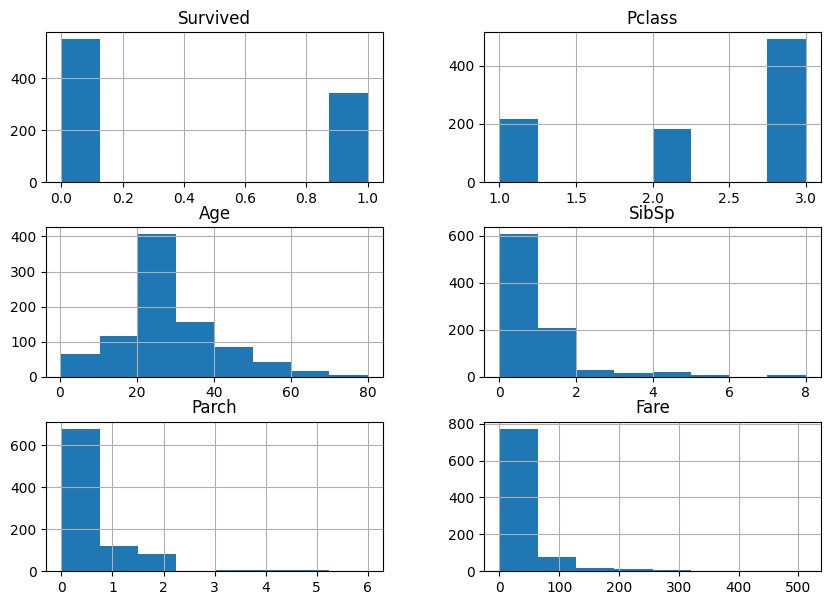

In [ ]:
df.hist(figsize=(10, 7), bins=8)
#plt.tight_layout()
plt.show()


In [ ]:
#feature engineering
df['family_size']=df['SibSp']+df['Parch']+1
df['isalone']=1
df.loc[df['family_size']>1,'isalone']=0
df.head()
df_encode=pd.get_dummies(df,columns=['Sex','Embarked','Pclass'],drop_first=True)
df_encode.head()

,Survived,Age,SibSp,Parch,Fare,family_size,isalone,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,2,0,True,False,True,False,True
1,1,38.0,1,0,71.2833,2,0,False,False,False,False,False
2,1,26.0,0,0,7.9250,1,1,False,False,True,False,True
3,1,35.0,1,0,53.1000,2,0,False,False,True,False,False
4,0,35.0,0,0,8.0500,1,1,True,False,True,False,True


In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_scale = ['Age', 'Fare', 'SibSp', 'Parch','family_size']

df_encode[columns_scale] = scaler.fit_transform(df_encode[columns_scale])

df_encode[columns_scale].head()
df_encode.info()
#df_encode.drop(['Cabin'],axis=1,inplace=True)
#df_encode.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   SibSp        891 non-null    float64
 3   Parch        891 non-null    float64
 4   Fare         891 non-null    float64
 5   family_size  891 non-null    float64
 6   isalone      891 non-null    int64  
 7   Sex_male     891 non-null    bool   
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
 10  Pclass_2     891 non-null    bool   
 11  Pclass_3     891 non-null    bool   
dtypes: bool(5), float64(5), int64(2)
memory usage: 53.2 KB


In [ ]:
#logistic regression model is applied
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x=df_encode.drop(['Survived'],axis=1)
y=df_encode['Survived']
model=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy:',acc)
print('precision:',precision)
print('recall:',recall)
print('f1_score:',f1)





accuracy: 0.7988826815642458
precision: 0.7878787878787878
recall: 0.7027027027027027
f1_score: 0.7428571428571429


In [ ]:
#RandomForestClassifier is applied
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

model=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1_score:',f1)


accuracy: 0.8324022346368715
precision: 0.8142857142857143
recall: 0.7702702702702703
f1_score: 0.7916666666666666


 Description of the Dataset and Features
The dataset used in this analysis is the Titanic passenger dataset, which contains information on 891 individuals. The target variable is Survived, a binary feature indicating whether a passenger survived (1) or not (0).

Features Included:
Age: Age of the passenger (float64)

SibSp: Number of siblings or spouses aboard (float64)

Parch: Number of parents or children aboard (float64)

Fare: Ticket fare (float64)

family_size: Total family members aboard (derived from SibSp + Parch + 1)

isalone: Binary flag indicating whether the passenger was traveling alone

Sex_male: Binary encoded gender (male as True)

Embarked_Q, Embarked_S: Dummy variables for port of embarkation

Pclass_2, Pclass_3: Dummy variables for passenger class

Data Preprocessing:
Missing values in the Age column were handled appropriately.

Irrelevant columns (such as Name, Ticket, and Cabin) were dropped from the dataset.

New features were engineered: family_size, isalone.

Categorical variables were encoded using dummy variables.

Normalization was applied to numerical columns such as Age and Fare to bring them to a similar scale.

 Results of the Model Evaluations
The performance of both models was evaluated using standard classification metrics: accuracy, precision, recall, and F1-score.


Metric	Logistic Regression	Random Forest Classifier
Accuracy	0.7989	0.8324
Precision	0.7879	0.8143
Recall	0.7027	0.7703
F1 Score	0.7429	0.7917